In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
brain_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EEG/emotions.csv')
label_df = brain_df['label']
brain_df.drop('label', axis = 1, inplace=True)
set_split = train_test_split(brain_df,label_df,test_size=0.3,random_state=0,stratify=label_df)
brain_train_data, brain_test_data, brain_train_label, brain_test_label = set_split
print(brain_train_data)
print(brain_test_data)
print(brain_train_label)
print(brain_test_label)

accuracy_dict = dict()

      # mean_0_a  mean_1_a  mean_2_a  ...  fft_747_b  fft_748_b  fft_749_b
1559       10.10      29.9      24.2  ...      -18.1      -18.1     -10.70
1068       14.00      23.6    -181.0  ...     -160.0     -160.0     343.00
1635       16.70      27.0    -168.0  ...     -165.0     -165.0     348.00
1106      -52.20      20.8    -970.0  ...     -261.0     -261.0     738.00
1772       13.60      25.2    -192.0  ...     -183.0     -183.0     404.00
...          ...       ...       ...  ...        ...        ...        ...
358         6.29      32.0    -359.0  ...     -247.0     -247.0     406.00
1659       13.50      25.2    -132.0  ...       57.6       57.6     -62.90
1243       30.30      31.5      33.3  ...      -21.1      -21.1       6.86
1586       16.60      32.4    -138.0  ...      194.0      194.0     -58.00
1438        3.93      30.2    -267.0  ...     -221.0     -221.0     306.00

[1492 rows x 2548 columns]
      # mean_0_a  mean_1_a  mean_2_a  ...  fft_747_b  fft_748_b  fft_749

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg_pipe = Pipeline([('scaler',StandardScaler()), ('clf', LogisticRegression(multi_class='auto',solver="liblinear"))])
logistic_reg_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(logistic_reg_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['logistic regression']=scores.mean()

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_reg_pipe = Pipeline([('scalar', StandardScaler()),('clf', RidgeClassifier())])
ridge_reg_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(ridge_reg_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['ridge regression']=scores.mean()

In [ ]:
from sklearn.svm import SVC
svm_pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVC())])
svm_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(svm_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['SVC']=scores.mean()

In [ ]:
from sklearn.svm import LinearSVC
linear_svm_pipe = Pipeline([('scaler', StandardScaler()), ('clf', LinearSVC(multi_class='crammer_singer',max_iter=1000000))])
linear_svm_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(linear_svm_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
print(scores.mean())
accuracy_dict['linear SVC']=scores.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9453125


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_pipe = Pipeline([('scaler',StandardScaler()), ('clf',RandomForestClassifier())])
random_forest_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(random_forest_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['random forest']=scores.mean()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_nb_pipe = Pipeline([('scaler',StandardScaler()), ('clf',BernoulliNB())])
bernoulli_nb_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(bernoulli_nb_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['bernoulli NB']=scores.mean()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb_pipe = Pipeline([('scaler',StandardScaler()), ('clf',GaussianNB())])
gaussian_nb_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(gaussian_nb_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['gaussian NB']=scores.mean()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_pipe=Pipeline([('scaler',StandardScaler()),('clf',DecisionTreeClassifier())])
dt_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(dt_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['Decision Tree']=scores.mean()

In [ ]:
from sklearn.tree import ExtraTreeClassifier
et_pipe=Pipeline([('scaler',StandardScaler()),('clf',ExtraTreeClassifier())])
et_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(et_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['Extra Tree']=scores.mean()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_pipe=Pipeline([('scaler',StandardScaler()),('clf',KNeighborsClassifier())])
kn_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(kn_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['K neighbors']=scores.mean()

In [ ]:
from sklearn.neighbors import NearestCentroid
nc_pipe=Pipeline([('scaler',StandardScaler()),('clf',NearestCentroid())])
nc_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(nc_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['nearest centroid']=scores.mean()

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_pipe=Pipeline([('scaler',StandardScaler()),('clf',MLPClassifier())])
mlp_pipe.fit(brain_train_data, brain_train_label)
scores = cross_val_score(mlp_pipe, brain_test_data, brain_test_label, cv=10,scoring='accuracy')
accuracy_dict['MLP']=scores.mean()

In [ ]:
from sklearn.model_selection import GridSearchCV

ridge_reg_pipe = Pipeline([('scalar', StandardScaler()),('clf', RidgeClassifier())])
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [
              {'clf__alpha':param_range}
]
gs = GridSearchCV(estimator=ridge_reg_pipe, param_grid=param_grid,scoring='accuracy',cv=5)
gs = gs.fit(brain_train_data, brain_train_label)
print(gs.best_score_)
print(gs.best_params_)

0.9436870103925837
{'clf__alpha': 100.0}


In [ ]:
svm_pipe = Pipeline([('scaler', StandardScaler()), ('clf', SVC(max_iter=-1))])
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [
              {'clf__C':param_range,'clf__kernel':['linear','poly','rbf','sigmoid'],'clf__gamma':['scale','auto']}
]
gs = GridSearchCV(estimator=svm_pipe, param_grid=param_grid,scoring='accuracy',cv=5)
gs = gs.fit(brain_train_data, brain_train_label)
print(gs.best_score_)
print(gs.best_params_)

0.9705012233170972
{'clf__C': 10.0, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}


In [ ]:
random_forest_pipe = Pipeline([('scaler',StandardScaler()), ('clf',RandomForestClassifier())])
param_range = [5,10,15,None]
param_grid = [
              {'clf__max_depth':param_range,'clf__criterion':['gini','entropy']}
]
gs = GridSearchCV(estimator=random_forest_pipe, param_grid=param_grid,scoring='accuracy',cv=5)
gs = gs.fit(brain_train_data, brain_train_label)
print(gs.best_score_)
print(gs.best_params_)

0.9865928935377433
{'clf__criterion': 'entropy', 'clf__max_depth': None}


In [ ]:
dt_pipe=Pipeline([('scaler',StandardScaler()),('clf',DecisionTreeClassifier())])
param_range = [5,10,15,None]
param_grid = [
              {'clf__max_depth':param_range,'clf__criterion':['gini','entropy'],'clf__splitter':['best','random']}
]
gs = GridSearchCV(estimator=dt_pipe, param_grid=param_grid,scoring='accuracy',cv=5)
gs = gs.fit(brain_train_data, brain_train_label)
print(gs.best_score_)
print(gs.best_params_)

0.9624722228457273
{'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__splitter': 'random'}


In [ ]:
et_pipe=Pipeline([('scaler',StandardScaler()),('clf',ExtraTreeClassifier())])
param_range = [5,10,15,None]
param_grid = [
              {'clf__max_depth':param_range,'clf__criterion':['gini','entropy']}
]
gs = GridSearchCV(estimator=et_pipe, param_grid=param_grid,scoring='accuracy',cv=5)
gs = gs.fit(brain_train_data, brain_train_label)
print(gs.best_score_)
print(gs.best_params_)

0.8940944086552491
{'clf__criterion': 'entropy', 'clf__max_depth': 10}


[('random forest', 0.9796875), ('linear SVC', 0.9453125), ('logistic regression', 0.9421875), ('MLP', 0.9390625), ('Decision Tree', 0.9375), ('SVC', 0.9234375), ('K neighbors', 0.921875), ('ridge regression', 0.903125), ('Extra Tree', 0.8515625), ('bernoulli NB', 0.8234375), ('nearest centroid', 0.7859375), ('gaussian NB', 0.70625)]


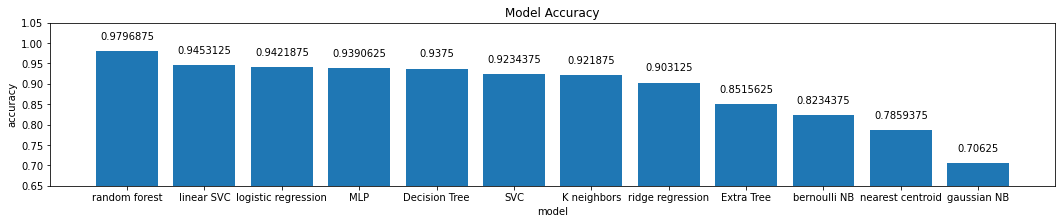

In [ ]:
order_accuracy_dict = sorted(accuracy_dict.items(), key=(lambda x:x[1]), reverse=True)
print(order_accuracy_dict)
plt.figure(figsize=(18,3))
plt.ylim(0.65,1.05)
plt.bar(*zip(*order_accuracy_dict))
for x, y in order_accuracy_dict:
  plt.text(x, y, str(y)+'\n', horizontalalignment='center')
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.show()
